# Final Capstone Project - Exploring Washington DC

In [1]:
# Importing required Libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
from bs4 import BeautifulSoup

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# import wordcloud and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

# import folium
import folium # plotting library

print('Libraries imported.')

Libraries imported.


In [2]:
# define a function to replace multiple values
def replace_many(string, rep_list, rep_as=""):
    for element in rep_list:
        string = string.replace(element, rep_as)
    
    return string

First lets generate a word cloud about Washington DC. The information to generate is read from the URL mentioned below.

In [6]:
url_wdc="https://www.10best.com/destinations/district-of-columbia/washington/"
page = urllib.request.urlopen(url_wdc)

In [7]:
# Using BeautifulSoup to do web scrapping
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())
all_info=soup.find_all('p')
req_info=soup.find_all('p', class_='')
print(req_info)

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="//css.10bestmedia.com" rel="dns-prefetch"/>
  <link href="//js.10bestmedia.com" rel="dns-prefetch"/>
  <link href="//img1.10bestmedia.com" rel="dns-prefetch"/>
  <link href="//img2.10bestmedia.com" rel="dns-prefetch"/>
  <link href="//ajax.googleapis.com" rel="dns-prefetch"/>
  <link href="//cdn.cookielaw.org" rel="dns-prefetch"/>
  <link href="//mtrx.go.sonobi.com" rel="dns-prefetch"/>
  <link href="//usatodaysports-d.openx.net" rel="dns-prefetch"/>
  <link href="//connect.facebook.net" rel="dns-prefetch"/>
  <link href="//script.crazyegg.com" rel="dns-prefetch"/>
  <link href="//tru.am" rel="dns-prefetch"/>
  <link href="//native.sharethrough.com" rel="dns-prefetch"/>
  <link href="//c.amazon-adsystem.com" rel="dns-prefetch"/>
  <link href="//rd.bookingbuddy.com" rel="dns-prefetch"/>
  <link href="//recirculation.spot.im" rel="dns-prefetch"/>
  <link href="//launcher.spot.im" rel="dns-prefe

In [8]:
# Clean up req_info to remove unnecessary info
del req_info[0]
rt = str(req_info)
replist=["<p>", "</p>", "[", "]"]
rt = replace_many(rt, replist) # replace unnecessary characters in req_info

# Write the info into a text tile
with open("WDC.txt", "w") as file1:
    file1.write(rt)

# open the file and read it into a variable wdc_data
wdc_data = open('WDC.txt', 'r').read()

stopwords = set(STOPWORDS)
# instantiate a word cloud object
wdc_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
wdc_wc.generate(wdc_data)

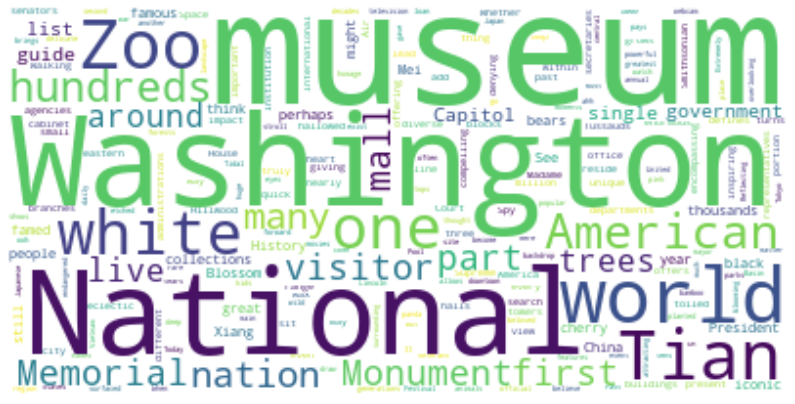

In [9]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wdc_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud shows that museum is one of the most used words in the description of Washington DC

Now lets explore Washington DC using Foursquare API

In [63]:
# information for foursquare api
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Assuming the person is at Union station, Washinghton DC

In [53]:
# Enter details about the user location
address = 'Union Station, Washington DC, USA'

geolocator = Nominatim(user_agent="wdc_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

38.897766 -77.0074143


Lets do a search for venues in the field of art using Foursquare API, within a radius of 2000m. 

In [16]:
radius = 2000
s_section = "arts"
# Define corresponding URL
url_arts = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&section={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, s_section, radius, LIMIT)

# get results for the search
results_arts = requests.get(url_arts).json()
results_arts

{'meta': {'code': 200, 'requestId': '5ec7277f47b43d00230be8fb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'NoMa',
  'headerFullLocation': 'NoMa, Washington',
  'headerLocationGranularity': 'neighborhood',
  'query': 'arts',
  'totalResults': 101,
  'suggestedBounds': {'ne': {'lat': 38.915766018000014,
    'lng': -76.98432916944391},
   'sw': {'lat': 38.87976598199998, 'lng': -77.03049943055608}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b09a487f964a520de1a23e3',
       'name': 'National Postal Museum',
       'location': {'address': '2 Massachusetts Ave NE',
        'crossStreet': 'North Capitol St NE',
        'lat': 38.89771724526776,
        'lng': -77.008291482925

In [17]:
# assign relevant part of JSON to venues
venues_arts = results_arts['response']['groups'][0]['items']
venues_arts

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b09a487f964a520de1a23e3',
   'name': 'National Postal Museum',
   'location': {'address': '2 Massachusetts Ave NE',
    'crossStreet': 'North Capitol St NE',
    'lat': 38.89771724526776,
    'lng': -77.00829148292542,
    'labeledLatLngs': [{'label': 'display',
      'lat': 38.89771724526776,
      'lng': -77.00829148292542}],
    'distance': 76,
    'postalCode': '20002',
    'cc': 'US',
    'city': 'Washington',
    'state': 'D.C.',
    'country': 'United States',
    'formattedAddress': ['2 Massachusetts Ave NE (North Capitol St NE)',
     'Washington, D.C. 20002',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d190941735',
     'name': 'History Museum',
     'pluralName': 'History Museums',
     'shortName': 'History Museum',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_enter

In [18]:
# tranform venues into a dataframe
df_arts = pd.json_normalize(venues_arts)
df_arts.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-7-4b09a487f964a520de1a23e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b09a487f964a520de1a23e3,National Postal Museum,2 Massachusetts Ave NE,North Capitol St NE,38.897717,-77.008291,"[{'label': 'display', 'lat': 38.89771724526776...",...,US,Washington,D.C.,United States,"[2 Massachusetts Ave NE (North Capitol St NE),...","[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",0,[],81105572,NaN
1,e-7-4ae35070f964a520469321e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ae35070f964a520469321e3,U.S. Capitol Visitor Center,E Capitol Cir,at E Capitol St,38.889813,-77.007979,"[{'label': 'display', 'lat': 38.88981257675331...",...,US,Washington,D.C.,United States,"[E Capitol Cir (at E Capitol St), Washington, ...","[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",0,[],NaN,NaN
2,e-7-4c5d85e6fff99c74dfe642d3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4c5d85e6fff99c74dfe642d3,National Gallery of Art - East Building,Constitution Ave NW,4th St. NW,38.891264,-77.016806,"[{'label': 'display', 'lat': 38.89126350936385...",...,US,Washington,D.C.,United States,"[Constitution Ave NW (4th St. NW), Washington,...","[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",0,[],NaN,NaN
3,e-7-4ae62e52f964a52065a521e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4ae62e52f964a52065a521e3,Folger Theater,201 E Capitol St SE,at 3rd St SE,38.889470,-77.002304,"[{'label': 'display', 'lat': 38.88946955833237...",...,US,Washington,D.C.,United States,"[201 E Capitol St SE (at 3rd St SE), Washingto...","[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",0,[],NaN,NaN
4,e-7-4ad862fcf964a5202a1121e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ad862fcf964a5202a1121e3,Belmont-Paul Women's Equality National Monument,144 Constitution Ave NE,at 2nd St NE,38.892112,-77.003667,"[{'label': 'display', 'lat': 38.89211191603596...",...,US,Washington,D.C.,United States,"[144 Constitution Ave NE (at 2nd St NE), Washi...","[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",0,[],43294650,Northeast Washington


In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in df_arts.columns if col.startswith('venue.location.')] + ['venue.id']
df_arts_filtered = df_arts.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_arts_filtered['categories'] = df_arts_filtered.apply(get_category_type, axis=1)

# drop unwanted/repeated columns
df_arts_filtered.drop(["venue.location.labeledLatLngs", "venue.categories", "venue.location.neighborhood"], axis=1, inplace=True)

# clean column names by keeping only last term
df_arts_filtered.columns = [column.split('.')[-1] for column in df_arts_filtered.columns]

df_arts_filtered.head()

,name,address,crossStreet,lat,lng,distance,postalCode,cc,city,state,country,formattedAddress,id,categories
0,National Postal Museum,2 Massachusetts Ave NE,North Capitol St NE,38.897717,-77.008291,76,20002,US,Washington,D.C.,United States,"[2 Massachusetts Ave NE (North Capitol St NE),...",4b09a487f964a520de1a23e3,History Museum
1,U.S. Capitol Visitor Center,E Capitol Cir,at E Capitol St,38.889813,-77.007979,886,20016,US,Washington,D.C.,United States,"[E Capitol Cir (at E Capitol St), Washington, ...",4ae35070f964a520469321e3,Museum
2,National Gallery of Art - East Building,Constitution Ave NW,4th St. NW,38.891264,-77.016806,1089,20565,US,Washington,D.C.,United States,"[Constitution Ave NW (4th St. NW), Washington,...",4c5d85e6fff99c74dfe642d3,Art Museum
3,Folger Theater,201 E Capitol St SE,at 3rd St SE,38.889470,-77.002304,1024,20003,US,Washington,D.C.,United States,"[201 E Capitol St SE (at 3rd St SE), Washingto...",4ae62e52f964a52065a521e3,Theater
4,Belmont-Paul Women's Equality National Monument,144 Constitution Ave NE,at 2nd St NE,38.892112,-77.003667,708,20002-5608,US,Washington,D.C.,United States,"[144 Constitution Ave NE (at 2nd St NE), Washi...",4ad862fcf964a5202a1121e3,History Museum


In [21]:
# Checking the number of unique categories of venues in the field of arts
print("There are {} categories related to Art".format(len(df_arts_filtered["categories"].unique())))
df_arts_filtered["categories"].unique()

There are 18 categories related to Art


array(['History Museum', 'Museum', 'Art Museum', 'Theater',
       'Performing Arts Venue', 'Science Museum', 'Exhibit', 'Public Art',
       'Indie Movie Theater', 'Art Gallery', 'Music Venue',
       'Movie Theater', 'Tour Provider', 'Dance Studio', 'Memorial Site',
       'Outdoor Sculpture', 'Planetarium', 'Arts & Entertainment'],
      dtype=object)

Exploratory analysis: Plot an Horizontal Bar Graph to find the number of venues in each category

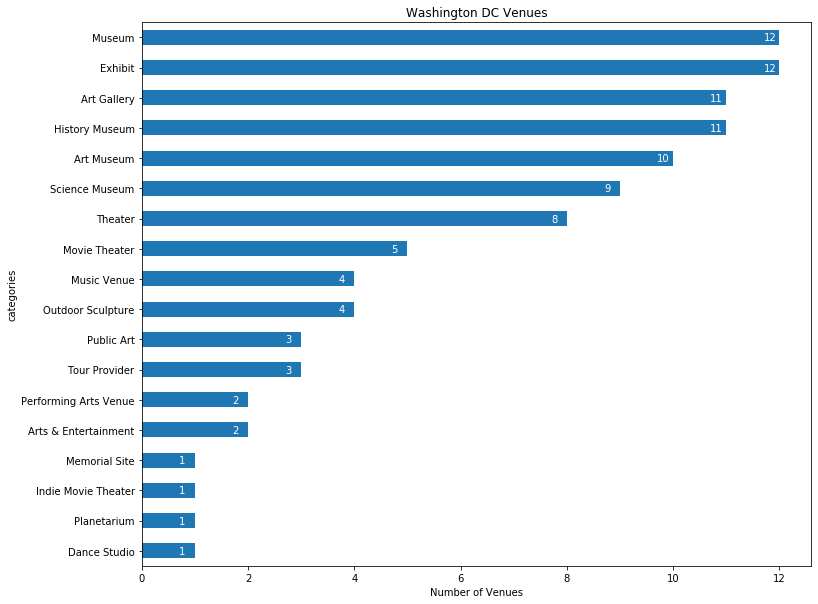

In [23]:
df_categories = df_arts_filtered.groupby("categories").count()
df_categories.sort_values(by="name", ascending=True, inplace=True)
df_categoriesCount = df_categories["name"]

#Bar Plot
df_categoriesCount.plot(kind="barh", figsize=(12,10))
plt.xlabel('Number of Venues')
plt.title('Washington DC Venues')
# annotate value labels to each country
for index, value in enumerate(df_categoriesCount): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 0.3 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value-0.3, index-0.1), color='white')

plt.show()

As mentioned in the Introduction/Business problem, science museums are of particular interest and will be explored further. We see that there are a total of 9 science museum venues.

In [24]:
# Use one hot coding to get the category of each venue in the data frame

# one hot encoding
art_onehot = pd.get_dummies(df_arts_filtered[['categories']], prefix="", prefix_sep="")
# add art venues column back to dataframe
art_onehot['name'] = df_arts_filtered['name'] 
# move neighborhood column to the first column
fixed_columns = [art_onehot.columns[-1]] + list(art_onehot.columns[:-1])
art_onehot = art_onehot[fixed_columns]

art_onehot.head()

,name,Art Gallery,Art Museum,Arts & Entertainment,Dance Studio,Exhibit,History Museum,Indie Movie Theater,Memorial Site,Movie Theater,Museum,Music Venue,Outdoor Sculpture,Performing Arts Venue,Planetarium,Public Art,Science Museum,Theater,Tour Provider
0,National Postal Museum,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,U.S. Capitol Visitor Center,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,National Gallery of Art - East Building,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Folger Theater,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Belmont-Paul Women's Equality National Monument,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# getting info about science museums
df_sm = df_arts_filtered[df_arts_filtered["categories"].str.contains("Science")]
df_scimuseums = df_sm.reset_index(drop=True)
df_scimuseums

,name,address,crossStreet,lat,lng,distance,postalCode,cc,city,state,country,formattedAddress,id,categories
0,National Air and Space Museum,655 Jefferson Drive SW,NaN,38.888444,-77.019846,1495,20560,US,Washington,D.C.,United States,"[655 Jefferson Drive SW, Washington, D.C. 2056...",4a0cfc37f964a52074751fe3,Science Museum
1,Smithsonian National Museum of Natural History...,1000 Constitution Ave NW,at 10th St NW,38.891204,-77.025982,1766,20560,US,Washington,D.C.,United States,"[1000 Constitution Ave NW (at 10th St NW), Was...",4a4a33bff964a52094ab1fe3,Science Museum
2,Dinosaurs/Hall of Paleobiology Exhibit,Lenfant Plz SW,at National Museum of Natural History,38.891190,-77.026325,1794,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4d695be4342b8cfaa7d6c72c,Science Museum
3,Butterflies and Plants - Partners in Evolution,Lenfant Plz SW,at National Museum of Natural History,38.890594,-77.026433,1830,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4e0366411f6edc1602351df9,Science Museum
4,Flight Simulator,NaN,NaN,38.888316,-77.020904,1572,20001,US,Washington,D.C.,United States,"[Washington, D.C. 20001, United States]",4ff9c606e4b0c98ddde81fec,Science Museum
5,National Gem Collection,NaN,NaN,38.890926,-77.025955,1777,20001,US,Washington,D.C.,United States,"[Washington, D.C. 20001, United States]",50c22b78e4b05fe30fa52188,Science Museum
6,Kenneth E. Behring Family Rotunda - Smithsonia...,Lenfant Plz SW,at 10th Street NW,38.890788,-77.025971,1785,20560,US,Washington,D.C.,United States,"[Lenfant Plz SW (at 10th Street NW), Washingto...",4d69563530a7236a114374ac,Science Museum
7,The Kenneth E. Behring Family Hall of Mammals,Lenfant Plz SW,at National Museum of Natural History,38.890824,-77.026049,1789,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4c39d9b22c8020a177458d00,Science Museum
8,Giant Leatherback Turtle,Natural History Museum,NaN,38.890873,-77.026024,1785,NaN,US,Washington,D.C.,United States,"[Natural History Museum, Washington, D.C., Uni...",4d4b293c5e1f6dcb52184d24,Science Museum


Lets obtain the rating of each venue using Foursquare API

In [29]:
rating = []

# As mentioned in the data section description, venues with no ratings returned by Foursquare API will not be considered.
for venue_id in df_scimuseums.id:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        rating.append(result['response']['venue']['rating'])
    except:
        rating.append(0.0)

df_scimuseums['rating'] = rating
df_scimuseums_rated = df_scimuseums.sort_values(by="rating", ascending=False).reset_index(drop=True)
df_scimuseums_rated

,name,address,crossStreet,lat,lng,distance,postalCode,cc,city,state,country,formattedAddress,id,categories,rating
0,Smithsonian National Museum of Natural History...,1000 Constitution Ave NW,at 10th St NW,38.891204,-77.025982,1766,20560,US,Washington,D.C.,United States,"[1000 Constitution Ave NW (at 10th St NW), Was...",4a4a33bff964a52094ab1fe3,Science Museum,9.2
1,National Air and Space Museum,655 Jefferson Drive SW,NaN,38.888444,-77.019846,1495,20560,US,Washington,D.C.,United States,"[655 Jefferson Drive SW, Washington, D.C. 2056...",4a0cfc37f964a52074751fe3,Science Museum,9.1
2,Dinosaurs/Hall of Paleobiology Exhibit,Lenfant Plz SW,at National Museum of Natural History,38.891190,-77.026325,1794,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4d695be4342b8cfaa7d6c72c,Science Museum,8.2
3,Butterflies and Plants - Partners in Evolution,Lenfant Plz SW,at National Museum of Natural History,38.890594,-77.026433,1830,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4e0366411f6edc1602351df9,Science Museum,8.2
4,Flight Simulator,NaN,NaN,38.888316,-77.020904,1572,20001,US,Washington,D.C.,United States,"[Washington, D.C. 20001, United States]",4ff9c606e4b0c98ddde81fec,Science Museum,7.3
5,National Gem Collection,NaN,NaN,38.890926,-77.025955,1777,20001,US,Washington,D.C.,United States,"[Washington, D.C. 20001, United States]",50c22b78e4b05fe30fa52188,Science Museum,7.3
6,Kenneth E. Behring Family Rotunda - Smithsonia...,Lenfant Plz SW,at 10th Street NW,38.890788,-77.025971,1785,20560,US,Washington,D.C.,United States,"[Lenfant Plz SW (at 10th Street NW), Washingto...",4d69563530a7236a114374ac,Science Museum,6.9
7,The Kenneth E. Behring Family Hall of Mammals,Lenfant Plz SW,at National Museum of Natural History,38.890824,-77.026049,1789,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4c39d9b22c8020a177458d00,Science Museum,6.7
8,Giant Leatherback Turtle,Natural History Museum,NaN,38.890873,-77.026024,1785,NaN,US,Washington,D.C.,United States,"[Natural History Museum, Washington, D.C., Uni...",4d4b293c5e1f6dcb52184d24,Science Museum,0.0


In [32]:
# Considerign top 4 science museums according to User rating
df_top4 = df_scimuseums_rated[["name", "rating"]][:4]
df_top4

,name,rating
0,Smithsonian National Museum of Natural History...,9.2
1,National Air and Space Museum,9.1
2,Dinosaurs/Hall of Paleobiology Exhibit,8.2
3,Butterflies and Plants - Partners in Evolution,8.2


Lets get the location coordinates and other details about the top 4 science museums

In [57]:
df_scimuseums_top4 = df_scimuseums_rated.loc[:3,:]
df_scimuseums_top4

,name,address,crossStreet,lat,lng,distance,postalCode,cc,city,state,country,formattedAddress,id,categories,rating
0,Smithsonian National Museum of Natural History...,1000 Constitution Ave NW,at 10th St NW,38.891204,-77.025982,1766,20560,US,Washington,D.C.,United States,"[1000 Constitution Ave NW (at 10th St NW), Was...",4a4a33bff964a52094ab1fe3,Science Museum,9.2
1,National Air and Space Museum,655 Jefferson Drive SW,NaN,38.888444,-77.019846,1495,20560,US,Washington,D.C.,United States,"[655 Jefferson Drive SW, Washington, D.C. 2056...",4a0cfc37f964a52074751fe3,Science Museum,9.1
2,Dinosaurs/Hall of Paleobiology Exhibit,Lenfant Plz SW,at National Museum of Natural History,38.891190,-77.026325,1794,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4d695be4342b8cfaa7d6c72c,Science Museum,8.2
3,Butterflies and Plants - Partners in Evolution,Lenfant Plz SW,at National Museum of Natural History,38.890594,-77.026433,1830,20560,US,Washington,D.C.,United States,[Lenfant Plz SW (at National Museum of Natural...,4e0366411f6edc1602351df9,Science Museum,8.2


In [54]:
# Folium Map plot of the Person's location (Union Station, Washington DC) and the top 4 science museums

venues_map = folium.Map(location=[latitude-0.002, longitude-0.002], zoom_start=14.5) # generate map centred around My position

# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Me',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# add popular spots to the map as blue circle markers
for lat, lng, label, rat in zip(df_scimuseums_top4.lat[:4], df_scimuseums_top4.lng[:4], df_scimuseums_top4.name[:4],df_scimuseums_top4.rating[:4]):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label+" "+str(rat),
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)
    

# display map
venues_map

4 museums are chosen since for an entusiast it usually takes a long time to finish exploring them. Now, say after visiting a couple of museums, the person wants to have something to eat or even head out for dinner after finishing all the 4 venues. Lets use Fourquare API to find the food venues around the mean location of the 4 museums.

In [36]:
latitude = df_scimuseums_top4["lat"].mean() #df_science_top4.loc[3,"lat"]
longitude = df_scimuseums_top4["lng"].mean() #df_science_top4.loc[3,"lng"]

In [39]:
# Get food venues
radius = 500
s_section = "food"
# Define corresponding URL
url_food = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&section={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, s_section, radius, LIMIT)

# get results for the search
results_food = requests.get(url_food).json()
results_food

{'meta': {'code': 200, 'requestId': '5ec72f3d6001fe001c370c52'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Northwest Washington',
  'headerFullLocation': 'Northwest Washington, Washington',
  'headerLocationGranularity': 'neighborhood',
  'query': 'food',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 38.89485801245526,
    'lng': -77.0188755943787},
   'sw': {'lat': 38.885858003455255, 'lng': -77.0304169557738}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4af4b677f964a52054f521e3',
       'name': 'The Capital Grille',
       'location': {'address': '601 Pennsylvania Ave NW',
        'lat': 38.89295694991948,
        'ln

In [40]:
# assign relevant part of JSON to venues
venues_food = results_food['response']['groups'][0]['items']
venues_food

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4af4b677f964a52054f521e3',
   'name': 'The Capital Grille',
   'location': {'address': '601 Pennsylvania Ave NW',
    'lat': 38.89295694991948,
    'lng': -77.02006727161813,
    'labeledLatLngs': [{'label': 'display',
      'lat': 38.89295694991948,
      'lng': -77.02006727161813}],
    'distance': 491,
    'postalCode': '20004',
    'cc': 'US',
    'neighborhood': 'Penn Quarter',
    'city': 'Washington',
    'state': 'D.C.',
    'country': 'United States',
    'formattedAddress': ['601 Pennsylvania Ave NW',
     'Washington, D.C. 20004',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d14e941735',
     'name': 'American Restaurant',
     'pluralName': 'American Restaurants',
     'shortName': 'American',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
      'suffix': '.p

In [41]:
# tranform venues into a dataframe
df_food = pd.json_normalize(venues_food)
df_food.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.venuePage.id
0,e-3-4af4b677f964a52054f521e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4af4b677f964a52054f521e3,The Capital Grille,601 Pennsylvania Ave NW,38.892957,-77.020067,"[{'label': 'display', 'lat': 38.89295694991948...",491,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-3-4e25b8188877099df4c110a1-1,0,"[{'summary': 'This spot is popular', 'type': '...",4e25b8188877099df4c110a1,Food Truck Land,NaN,38.887267,-77.022557,"[{'label': 'display', 'lat': 38.88726675200064...",388,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e-3-57e637af498e37056feaddfd-2,0,"[{'summary': 'This spot is popular', 'type': '...",57e637af498e37056feaddfd,BLT Prime by David Burke,1100 Pennsylvania Avenue NW,38.894213,-77.027607,"[{'label': 'display', 'lat': 38.894213, 'lng':...",499,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e-3-5272820511d2bd005c675390-3,0,"[{'summary': 'This spot is popular', 'type': '...",5272820511d2bd005c675390,CHOPT,801 Pennsylvania Ave NW,38.894207,-77.023256,"[{'label': 'display', 'lat': 38.89420724510311...",445,...,0,[],at 9th St NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-3-54358475498e3a3f0382e3f4-4,0,"[{'summary': 'This spot is popular', 'type': '...",54358475498e3a3f0382e3f4,b DC Penn Quarter,801 Pennsylvania Ave NW,38.894287,-77.023065,"[{'label': 'display', 'lat': 38.89428682237135...",458,...,0,[],at 8th St NW,333434,https://www.grubhub.com/restaurant/b-dc-penn-q...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,122473333


In [42]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in df_food.columns if col.startswith('venue.location.')] + ['venue.id']
df_food_filtered = df_food.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_food_filtered['categories'] = df_food_filtered.apply(get_category_type, axis=1)

# drop unwanted/repeated columns
df_food_filtered.drop(["venue.location.labeledLatLngs", "venue.categories"], axis=1, inplace=True)

# clean column names by keeping only last term
df_food_filtered.columns = [column.split('.')[-1] for column in df_food_filtered.columns]

df_food_filtered.head()

,name,address,lat,lng,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id,categories
0,The Capital Grille,601 Pennsylvania Ave NW,38.892957,-77.020067,491,20004,US,Penn Quarter,Washington,D.C.,United States,"[601 Pennsylvania Ave NW, Washington, D.C. 200...",NaN,4af4b677f964a52054f521e3,American Restaurant
1,Food Truck Land,NaN,38.887267,-77.022557,388,NaN,US,NaN,NaN,"Washington, D.C.",United States,"[Washington, D.C., United States]",NaN,4e25b8188877099df4c110a1,Food Truck
2,BLT Prime by David Burke,1100 Pennsylvania Avenue NW,38.894213,-77.027607,499,20004,US,NaN,Washington,D.C.,United States,"[1100 Pennsylvania Avenue NW, Washington, D.C....",NaN,57e637af498e37056feaddfd,Steakhouse
3,CHOPT,801 Pennsylvania Ave NW,38.894207,-77.023256,445,20004,US,NaN,Washington,D.C.,United States,"[801 Pennsylvania Ave NW (at 9th St NW), Washi...",at 9th St NW,5272820511d2bd005c675390,Salad Place
4,b DC Penn Quarter,801 Pennsylvania Ave NW,38.894287,-77.023065,458,20004,US,Penn Quarter,Washington,D.C.,United States,"[801 Pennsylvania Ave NW (at 8th St NW), Washi...",at 8th St NW,54358475498e3a3f0382e3f4,Burger Joint


In [43]:
# Plot locations of the food venues on a Map

venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around My position

# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=6,
    popup='Me',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(df_food_filtered.lat[:20], df_food_filtered.lng[:20], df_food_filtered.name[:20]):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)


# display map
venues_map



Get ratings for the food venues using Foursquare API

In [49]:
df_food = pd.DataFrame(df_food_filtered)
rating = []
for venue_id in df_food.id:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        rating.append(result['response']['venue']['rating'])
    except:
        rating.append(0.0)
    
df_food["rating"] = rating
df_food_rated = df_food.sort_values(by="rating", ascending=False).reset_index(drop=True)
df_food_rated.head()

,name,address,lat,lng,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id,categories,rating
0,The Capital Grille,601 Pennsylvania Ave NW,38.892957,-77.020067,491,20004,US,Penn Quarter,Washington,D.C.,United States,"[601 Pennsylvania Ave NW, Washington, D.C. 200...",NaN,4af4b677f964a52054f521e3,American Restaurant,8.8
1,BLT Prime by David Burke,1100 Pennsylvania Avenue NW,38.894213,-77.027607,499,20004,US,NaN,Washington,D.C.,United States,"[1100 Pennsylvania Avenue NW, Washington, D.C....",NaN,57e637af498e37056feaddfd,Steakhouse,8.5
2,Food Truck Land,NaN,38.887267,-77.022557,388,NaN,US,NaN,NaN,"Washington, D.C.",United States,"[Washington, D.C., United States]",NaN,4e25b8188877099df4c110a1,Food Truck,7.9
3,CHOPT,801 Pennsylvania Ave NW,38.894207,-77.023256,445,20004,US,NaN,Washington,D.C.,United States,"[801 Pennsylvania Ave NW (at 9th St NW), Washi...",at 9th St NW,5272820511d2bd005c675390,Salad Place,7.9
4,b DC Penn Quarter,801 Pennsylvania Ave NW,38.894287,-77.023065,458,20004,US,Penn Quarter,Washington,D.C.,United States,"[801 Pennsylvania Ave NW (at 8th St NW), Washi...",at 8th St NW,54358475498e3a3f0382e3f4,Burger Joint,7.7


Food trucks are available in the area. But for this analysis, Food trucks are not considered since their locations may change on any given day. S0, only restaurants are considered.

In [50]:
df_restaurant = df_food[df_food["categories"].str.contains("Restaurant")].reset_index(drop=True)
df_restaurant.head()

,name,address,lat,lng,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id,categories,rating
0,The Capital Grille,601 Pennsylvania Ave NW,38.892957,-77.020067,491,20004,US,Penn Quarter,Washington,D.C.,United States,"[601 Pennsylvania Ave NW, Washington, D.C. 200...",NaN,4af4b677f964a52054f521e3,American Restaurant,8.8
1,Benjamin Bar & Lounge,1100 Pennsylvania Avenue NW,38.894060,-77.027580,484,20004,US,NaN,Washington,D.C.,United States,"[1100 Pennsylvania Avenue NW, Washington, D.C....",NaN,57ea9b31cd1098703568181f,Restaurant,7.5
2,Garden Café,National Gallery of Art,38.891320,-77.019939,421,20001,US,NaN,Washington,D.C.,United States,"[National Gallery of Art, Washington, D.C. 200...",NaN,4e63e23e7d8b85408a4a84d3,Italian Restaurant,0.0


The Capital Grille is the top rated restaurant available with an user rating of 8.8. Lets map the coordinates of The Capital Grille using folium.

In [51]:
rest_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around My position

# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=6,
    popup='Me',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(rest_map)

# add popular spots to the map as blue circle markers
folium.features.CircleMarker(
    [df_restaurant.lat[0], df_restaurant.lng[0]],
    radius=6,
    popup=df_restaurant.name[0]+", "+ str(df_restaurant.rating[0]),
    fill=True,
    color='black',
    fill_color='yellow',
    fill_opacity=0.9
    ).add_to(rest_map)
    

# display map
rest_map

Well, the person could have a good meal at the Capital Grille and head on home or explore more of DC's night life. Washington DC has a great night life and that by itself could be one good topic of analysis. M Street or Adam Morgans are some of the good places.